<a href="https://colab.research.google.com/github/grace-gg/neur-265/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alzheimer’s dataset:**

Groups: No dementia vs. dementia (Cognitive status)

Dependent variables: percent positive area GFAP and percent positive area a-Syn

**Patch-seq dataset:**

Groups: Vip neurons vs. Sst neurons

Dependent variables: F I curve slope and Avg ISI

For each analysis, you should create the following: 

a) Some way of visualizing the distribution of each dependent variable – a  histogram, for example 

b) Some way of visualizing the distribution of each grouping variable – a bar  graph, or pie chart, for example 

c) A scatter plot showing the relationship between the two dependent variables,  with dots color-coded by group 

d) Two boxplots – one for each dependent variable – showing how each  dependent variable distribution differs between groups 


In [82]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import numpy as np 

In [100]:
#load alzheimers pathology csv file
url1 = 'https://raw.githubusercontent.com/grace-gg/neur-265/main/alzheimers_pathology.csv'
alzheimers_pathology = pd.read_csv(url1)

#get rid of empty values
alzheimers_pathology['percent GFAP positive area_Grey matter'] = alzheimers_pathology['percent GFAP positive area_Grey matter'].fillna(0)
alzheimers_pathology['percent aSyn positive area_Grey matter'] = alzheimers_pathology['percent aSyn positive area_Grey matter'].fillna(0)

alzheimers_pathology

,Donor ID,Cognitive Status,percent GFAP positive area_Grey matter,percent aSyn positive area_Grey matter
0,H19.33.004,No dementia,15.111457,0.0
1,H20.33.001,No dementia,5.333720,0.0
2,H20.33.002,No dementia,16.313595,0.0
3,H20.33.004,Dementia,5.894042,0.0
4,H20.33.005,No dementia,2.051939,0.0
...,...,...,...,...
86,NaN,NaN,0.000000,0.0
87,NaN,NaN,0.000000,0.0
88,NaN,NaN,0.000000,0.0
89,NaN,NaN,0.000000,0.0


SkewtestResult(statistic=4.882132807928203, pvalue=1.049445346115917e-06)
DescribeResult(nobs=91, minmax=(0.0, 26.47735253), mean=5.556344343813186, variance=22.72118902991425, skewness=1.518800428553952, kurtosis=3.1838996887436934)


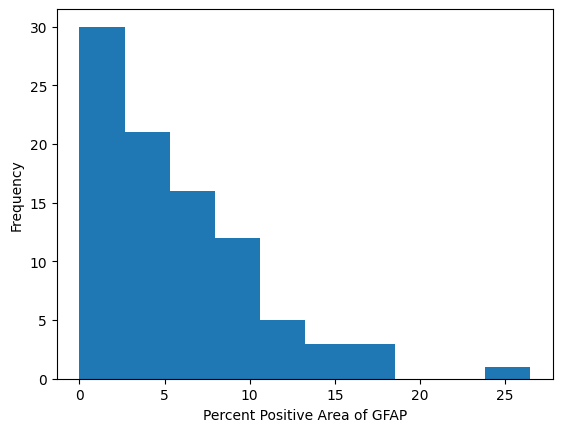

In [85]:
#histogram for percent positive area GFAP dependent variable
plt.hist(alzheimers_pathology['percent GFAP positive area_Grey matter'])
plt.xlabel('Percent Positive Area of GFAP')
plt.ylabel('Frequency')

#skewness test
print(stats.skewtest(alzheimers_pathology['percent GFAP positive area_Grey matter']))
print(stats.describe(alzheimers_pathology['percent GFAP positive area_Grey matter']))

SkewtestResult(statistic=9.39683841072292, pvalue=5.622718874378684e-21)
DescribeResult(nobs=91, minmax=(0.0, 0.090592499), mean=0.0030658606703296712, variance=0.00014333175794255932, skewness=5.336429890523758, kurtosis=32.05170613225551)


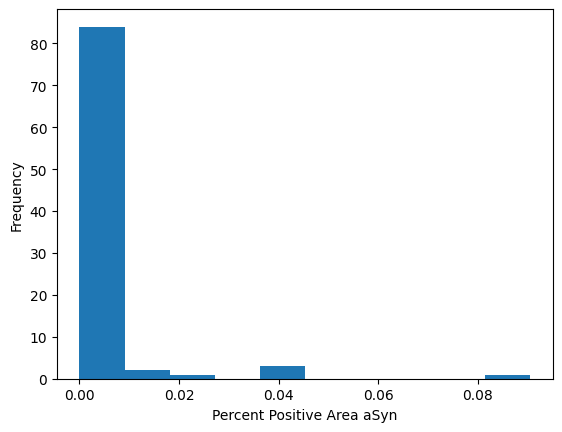

In [86]:
#histogram for percent positive area a-Syn dependent variable
plt.hist(alzheimers_pathology['percent aSyn positive area_Grey matter'])
plt.xlabel('Percent Positive Area aSyn')
plt.ylabel('Frequency')

#skewness test
print(stats.skewtest(alzheimers_pathology['percent aSyn positive area_Grey matter']))
print(stats.describe(alzheimers_pathology['percent aSyn positive area_Grey matter']))

Text(0, 0.5, 'Counts')

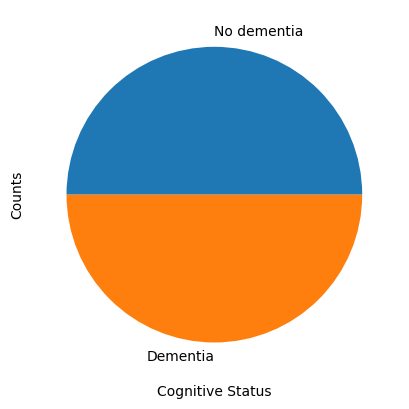

In [87]:
#pie chart for dementia/no dementia grouping variables
alzheimers_pathology['Cognitive Status'].value_counts().plot(kind='pie')
plt.xlabel('Cognitive Status')
plt.ylabel('Counts')

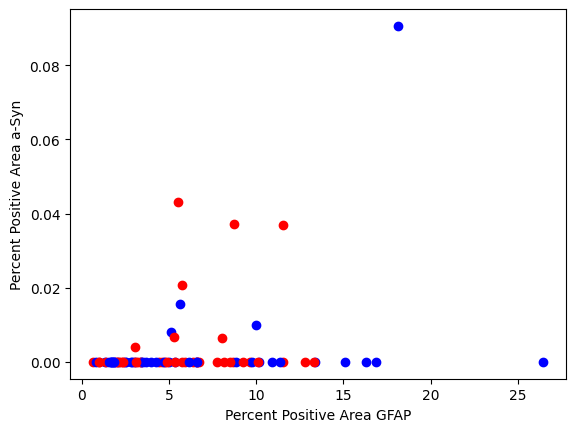

In [88]:
#scatterplot comparing percent positive area GFAP and percent positive area a-Syn. 

alzheimers_length = len(alzheimers_pathology)

for i in range(alzheimers_length):
  if alzheimers_pathology.iloc[i,1] == 'Dementia':
    plt.scatter(alzheimers_pathology.iloc[i,2],alzheimers_pathology.iloc[i,3],color='red')
  elif alzheimers_pathology.iloc[i,1] == 'No dementia':
    plt.scatter(alzheimers_pathology.iloc[i,2],alzheimers_pathology.iloc[i,3],color='blue')
  plt.xlabel('Percent Positive Area GFAP')
  plt.ylabel('Percent Positive Area a-Syn')



WilcoxonResult(statistic=0.0, pvalue=1.7106552178285207e-15)
WilcoxonResult(statistic=0.0, pvalue=0.0033456181158508813)


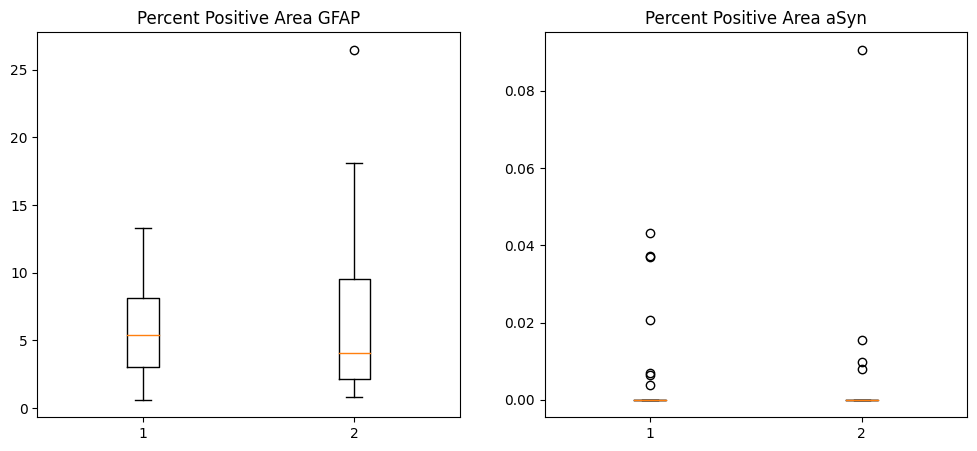

In [89]:
#Two boxplots - one for GFAP and one for a-Syn - showing how each variable differs between groups
alzheimers_pathology[alzheimers_pathology['Cognitive Status'] == 'Dementia']
GFAP_dementia_data = alzheimers_pathology[alzheimers_pathology['Cognitive Status'] == 'Dementia']
alzheimers_pathology[alzheimers_pathology['Cognitive Status'] == 'No dementia']
GFAP_no_dementia_data = alzheimers_pathology[alzheimers_pathology['Cognitive Status'] == 'No dementia']

GFAP_dementia_ft = GFAP_dementia_data['percent GFAP positive area_Grey matter']
GFAP_no_dementia_ft = GFAP_no_dementia_data['percent GFAP positive area_Grey matter']

GFAP_data = [GFAP_dementia_ft.tolist(), GFAP_no_dementia_ft.tolist()]

aSyn_dementia_data = alzheimers_pathology[alzheimers_pathology['Cognitive Status'] == 'Dementia']
aSyn_no_dementia_data = alzheimers_pathology[alzheimers_pathology['Cognitive Status'] == 'No dementia']
aSyn_dementia_ft = aSyn_dementia_data['percent aSyn positive area_Grey matter']
aSyn_no_dementia_ft = aSyn_no_dementia_data['percent aSyn positive area_Grey matter']

aSyn_data = [aSyn_dementia_ft.tolist(), aSyn_no_dementia_ft.tolist()]

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].boxplot(GFAP_data)
ax[0].set_title('Percent Positive Area GFAP')
ax[1].boxplot(aSyn_data)
ax[1].set_title('Percent Positive Area aSyn')

#results (statistic and p-value) from Wilcoxon’s rank-sum test (data are not normally  distributed) 
print(stats.wilcoxon(alzheimers_pathology['percent GFAP positive area_Grey matter']))
print(stats.wilcoxon(alzheimers_pathology['percent aSyn positive area_Grey matter']))

In [90]:
#load patch seq csv file
url2 = 'https://raw.githubusercontent.com/grace-gg/neur-265/main/patch_seq.csv'
patch_seq = pd.read_csv(url2)

#get rid of empty values
patch_seq['Avg ISI'] = patch_seq['Avg ISI'].fillna(0)
patch_seq['F I curve slope'] = patch_seq['F I curve slope'].fillna(0)

print(patch_seq)

               Project ID T type sub-class    Avg ISI  F I curve slope
0     1HEYEW7GMUKWIQW37BO  Sst interneuron  77.337143         0.219149
1     1HEYEW7GMUKWIQW37BO  Sst interneuron  44.145000         0.075000
2     1HEYEW7GMUKWIQW37BO  Vip interneuron  43.195455         0.362500
3     1HEYEW7GMUKWIQW37BO  Sst interneuron   7.840000         0.015000
4     1HEYEW7GMUKWIQW37BO  Sst interneuron  73.090000         0.100000
...                   ...              ...        ...              ...
2515  1HEYEW7GMUKWIQW37BO  Sst interneuron  42.197391         0.384286
2516  1HEYEW7GMUKWIQW37BO  Sst interneuron  44.132381         0.314286
2517  1HEYEW7GMUKWIQW37BO  Sst interneuron  64.403333         0.290000
2518  1HEYEW7GMUKWIQW37BO  Sst interneuron  57.656250         0.433621
2519  1HEYEW7GMUKWIQW37BO  Sst interneuron  26.180000         0.331250

[2520 rows x 4 columns]


SkewtestResult(statistic=16.73361088884888, pvalue=7.457674040430719e-63)
DescribeResult(nobs=2520, minmax=(-0.131707317, 1.813636306), mean=0.2597525027242064, variance=0.03271882194617432, skewness=0.954552653090234, kurtosis=3.7334746121042093)


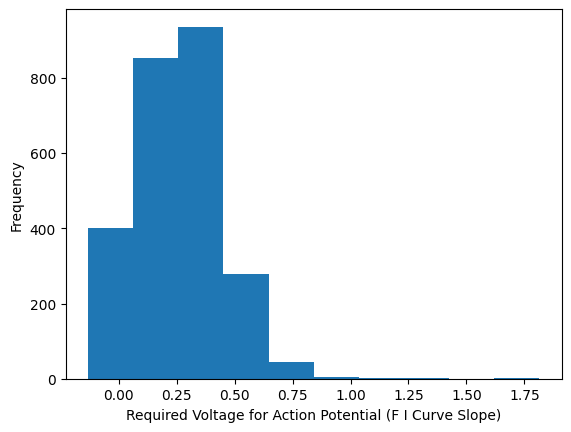

In [91]:
#histogram for F I curve slope variable
plt.hist(patch_seq['F I curve slope'])
plt.xlabel('Required Voltage for Action Potential (F I Curve Slope)')
plt.ylabel('Frequency')

#skewness test
print(stats.skewtest(patch_seq['F I curve slope']))
print(stats.describe(patch_seq['F I curve slope']))

SkewtestResult(statistic=44.82897083397351, pvalue=0.0)
DescribeResult(nobs=2520, minmax=(0.0, 968.9), mean=55.61854276967818, variance=2156.0031522696254, skewness=5.82959921315765, kurtosis=75.97983369113074)


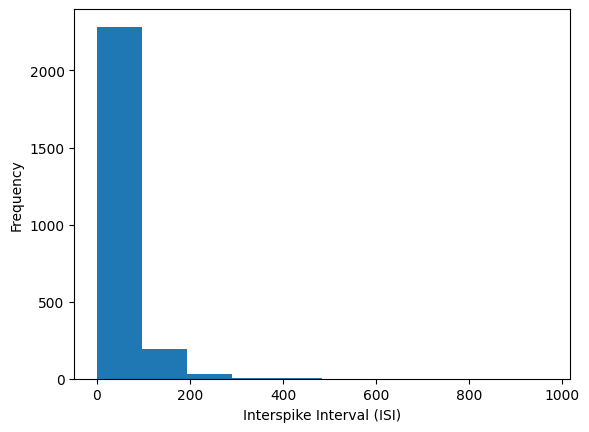

In [92]:
#histogram for Avg ISI
plt.hist(patch_seq['Avg ISI'])
plt.xlabel('Interspike Interval (ISI)')
plt.ylabel('Frequency')

#skewness test
print(stats.skewtest(patch_seq['Avg ISI']))
print(stats.describe(patch_seq['Avg ISI']))

Text(0, 0.5, 'Counts')

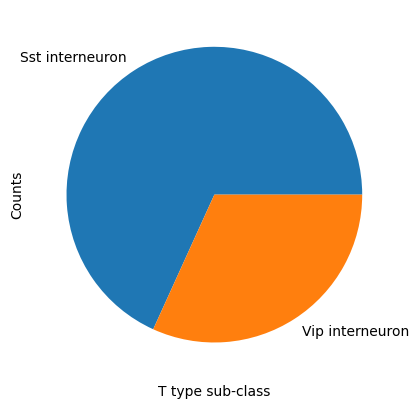

In [93]:
#pie chart for Vip/Sst grouping variables
patch_seq['T type sub-class'].value_counts().plot(kind='pie')
plt.xlabel('T type sub-class')
plt.ylabel('Counts')

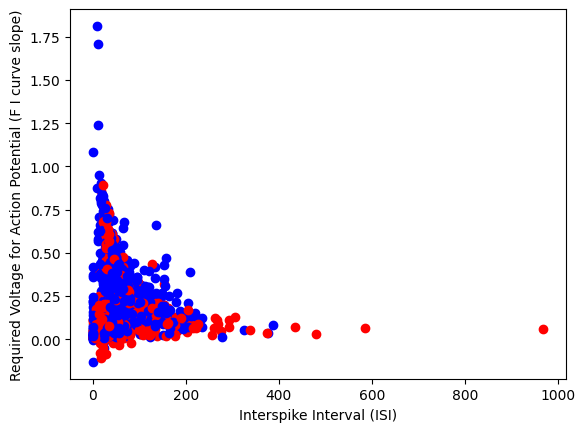

In [94]:
#scatterplot comparing F I curve slope and Avg ISI. 
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,1] == 'Vip interneuron':
    plt.scatter(patch_seq.iloc[i,2], patch_seq.iloc[i,3], color = 'red')
  if patch_seq.iloc[i,1] == 'Sst interneuron':
    plt.scatter(patch_seq.iloc[i,2], patch_seq.iloc[i,3], color = 'blue')
    
  plt.xlabel('Interspike Interval (ISI)')
  plt.ylabel('Required Voltage for Action Potential (F I curve slope)')


WilcoxonResult(statistic=4694.5, pvalue=0.0)
WilcoxonResult(statistic=0.0, pvalue=0.0)


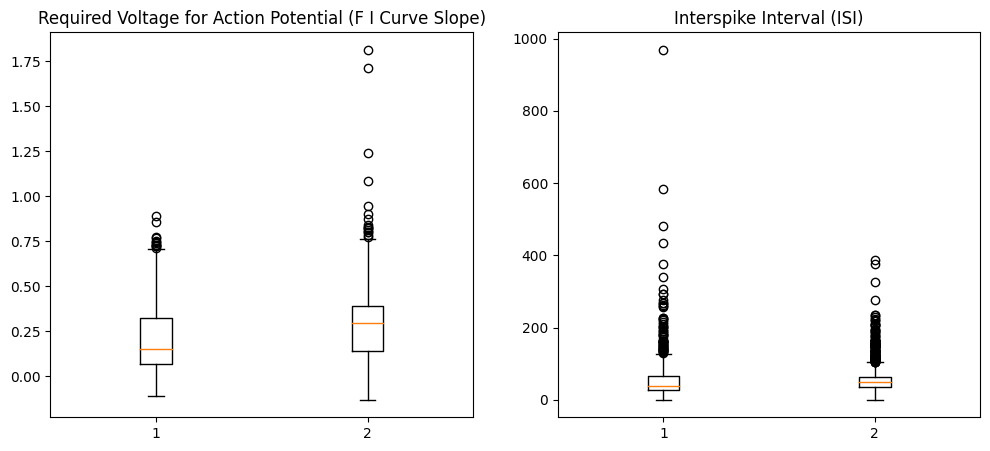

In [95]:
#Two boxplots - one for F I curve slope and one for Avg ISI - showing how each variable differs between groups
patch_seq[patch_seq['T type sub-class'] == 'Vip interneuron']
F_I_curve_slope_Vip_data = patch_seq[patch_seq['T type sub-class'] == 'Vip interneuron']
patch_seq[patch_seq['T type sub-class'] == 'Sst interneuron']
F_I_curve_slope_Sst_data = patch_seq[patch_seq['T type sub-class'] == 'Sst interneuron']

F_I_curve_slope_Vip_ft = F_I_curve_slope_Vip_data['F I curve slope']
F_I_curve_slope_Sst_ft = F_I_curve_slope_Sst_data['F I curve slope']

F_I_curve_slope_data = [F_I_curve_slope_Vip_ft.tolist(), F_I_curve_slope_Sst_ft.tolist()]

Avg_ISI_Vip_data = patch_seq[patch_seq['T type sub-class'] == 'Vip interneuron']
Avg_ISI_Sst_data = patch_seq[patch_seq['T type sub-class'] == 'Sst interneuron']
Avg_ISI_Vip_ft = Avg_ISI_Vip_data['Avg ISI']
Avg_ISI_Sst_ft = Avg_ISI_Sst_data['Avg ISI']

Avg_ISI_data = [Avg_ISI_Vip_ft.tolist(), Avg_ISI_Sst_ft.tolist()]

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].boxplot(F_I_curve_slope_data)
ax[0].set_title('Required Voltage for Action Potential (F I Curve Slope)')
ax[1].boxplot(Avg_ISI_data)
ax[1].set_title('Interspike Interval (ISI)')

#results (statistic and p-value) from Wilcoxon’s rank-sum test (data are not normally  distributed) 
print(stats.wilcoxon(patch_seq['F I curve slope']))
print(stats.wilcoxon(patch_seq['Avg ISI']))
